In [3]:
import random
import numpy as np

In [20]:
np.random.randint(1,9)

5

# PARAMETRIC AND NON-PARAMETRIC TESTS
Parametric and non-parametric tests seek to describe the characteristics of the population. **Parametric tests** assume that the data from which the population is taken has an underlying distribution while the **non-parametric tests** assume that there is no such distribution.

The parametric test assumes that the population has the following characteristics:
* Samples drawn from the population are **random and taken independently** 
* The samples are drawn from **a normal distribution** or approximately normal distribution with some sort of symmetry of data points
* The data has **no outliers**
* Data from samples have **approximately equal variance**

**Note** 
* When the assumptions above are met, parametric methods very powerful and detect the real effect if it exists. However, when the assumptions are not met, the test may produce misleading results. 
* Parametric methods are not good at detecting nonlinear relationships among the variables like the non-parametric methods

On the other hand, the non-parametric methods assume that
* The data points are **randomly selected** from the population and are **independent** from one another
* The measurements across all data points are **consistent (homogeneous)**

In most cases, non-parametric methods are used in situations where one is not interested in the population mean or proportion and when there is no need to make assumptions about underlaying distribution of the population. 

Examples of the tests


| Parametric tests |  Non-Parametric tests | 
|:-----------------|:-----------------|
 |Z-test    |      |                     
|Used to test for a difference of mean or proportion for known population variance <br/>  The sample size should be at least 30  <br/> $$z=\dfrac{\bar{x}-\mu}{\dfrac{\sigma}{\sqrt{n}}}$$      |    |            
|t-test    |       |                   
|Used to test for a difference of mean or proportion for unknown population variance <br/>  and sample size is between 15 and 30 <br/> $$t=\dfrac{\bar{x}-\mu}{\dfrac{s}{\sqrt{n}}}$$       |  | 
|Paired (dependent)t-test    | Wilcoxon rank-sum test  |                         
|Used to test for a difference of two mean or proportion of two samples taken before <br/>and after an intervention. <br/> Here, data is taken from the same subject. For example, the fitness of sportsman before after and before an <br/>exercise programme   The *t*-statistics is $$t=\dfrac{\bar{D}-\mu_D}{\sqrt{\dfrac{s_D^2}{n}}}$$  <br/> degrees of freedom = $n-1$ and $D$ represents the difference in means. **Degrees of freedom** is the number of independent pieces of information used to calculate a statistic.<br/> Hypothesis test: $ H_0: \mu_D = 0; H_1: \mu_D < 0 $ or $H_0: \mu_D = 0, H_1: \mu_D > 0$ or $H_0: \mu_D = 0, H_1: \mu_D \neq 0$  |  |
|Two sampled (independent)t-test    |     Mann-Whitney U-test     |                  
|Used to test for a difference of two mean or proportion of two samples from different <br/> sections in the same population. Here, data is taken from the same subject. The distribution should be <br/> normally distributed with approximately equal variances <br />For example, the weight of grade 5 students in different schools <br/> The *t*-statistics is $$t=\dfrac{(\bar{x_1}-\bar{x_2})-(\mu_1-\mu_2)}{\sqrt{\dfrac{s_1^2}{n_1}+\dfrac{s_2^2}{n_2}}}$$  <br/> degrees of freedom = $n_1+n_2-1$, $D$ represents the difference in means <br/> Hypothesis test: $ H_0: \mu_D = 0; H_1: \mu_D < 0 $ or $H_0: \mu_D = 0, H_1: \mu_D > 0$ or $H_0: \mu_D = 0, H_1: \mu_D \neq 0$ | |
| One way Analysis of Variance(ANOVA) |  Kruskal-Wallis test    |
| This test determines the difference in the mean of two or more groups with <br/>one independent variable for at least two levels   |
|Pearson's correlation coefficient($r$)|   Spearman’s rank correlation  |
|It tests the association of two numeric variables. It between $-1$ and $1$ <br/>where $-1$ implies negative strong correlation and $1$ implies a position strong correlation|   |

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [25]:
housing_data=pd.read_csv('housing.csv')
housing_data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [26]:
from statsmodels.stats.weightstats import ztest


### One Sample ztest

We will use the `ztests` function from `statsmodels.stats.weightstats` module

Hypothesis
* H_0: There is no significant difference among the samples
* H_1: There is a significant difference among the samples
  
Assume that our data represents the whole population. We will take a sample of 100 and do our analysis

**Use the ztest to determine if there is a significant difference in the median income in the simple random sample compared to that of the population**

In [58]:
#np.random.seed(42)

In [45]:
#Calculate the sample mean and population mean
population_mean=housing_data['median_income'].mean()
#np.random.seed(42)
zsample1=housing_data.sample(100)['median_income']#random sample of 100 items

In [46]:
zsample1.head()

4251     2.9760
20015    2.7298
12138    2.6250
14277    1.9509
13754    7.5822
Name: median_income, dtype: float64

In [47]:
housing_data['median_income'].size

20640

In [48]:
ztest(zsample1,None,population_mean)#We test if their is a significance difference between the sample mean and the population mean

(np.float64(0.637286617637794), np.float64(0.5239381662149822))

In [49]:
statistic,p_value=ztest(zsample1,None,population_mean)

In [50]:
p_value

np.float64(0.5239381662149822)

In [51]:
p_value <0.05

np.False_

Since the **p-value** is less than 0.05, we reject the null hypothesis. Therefore, there is enough evidence to state that the median_income in the sample is different from that of the population

### One Sample ttest

Hypothesis
* H_0: There is no significant difference among the samples
* H_1: There is a significant difference among the samples
  
**Use the ttest to determine if there is a significant difference in the median income in the simple random sample compared to that of the population**

In [56]:
from scipy import stats
#Calculate the sample mean and population mean
population_mean=housing_data['median_income'].mean()
#np.random.seed(42)
tsample1=housing_data.sample(20)['median_income']
t_stat,p_value=stats.ttest_1samp(tsample1,population_mean)

In [55]:
tsample1.size

20

In [57]:
p_value

np.float64(0.19500394178900668)

If the p_value is more than 0.05, we do not have enough evidence to reject the null hypothesis, therefore, there is no significance difference from the population mean

## Paired (dependent)t-test

Hypothesis
* H_0: There is no significant difference among the samples
* H_1: There is a significant difference among the samples
  
**Use the ztest to determine if there is a significant difference in the median income in the simple random sample compared to that of the population**

In [63]:
np.random.normal(0,1,len(zsample1))[:10] #generating a normal distribution of mean 0 and std devation 1 

array([-0.68100858, -0.70961997, -0.9186767 , -0.28200905,  0.13001571,
        0.84587725, -1.03048947,  1.14001485,  0.64515458,  0.81582197])

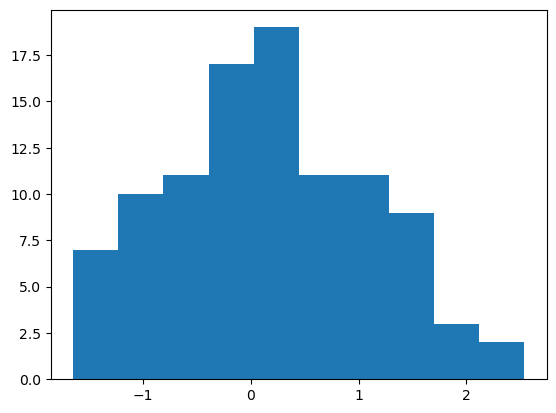

In [28]:
plt.hist(np.random.normal(0,1,len(zsample1))); #np.random.normal(mu=0,sigma=0, n =sample size) draws a normal distribution

In [65]:
list(range(0,100))[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

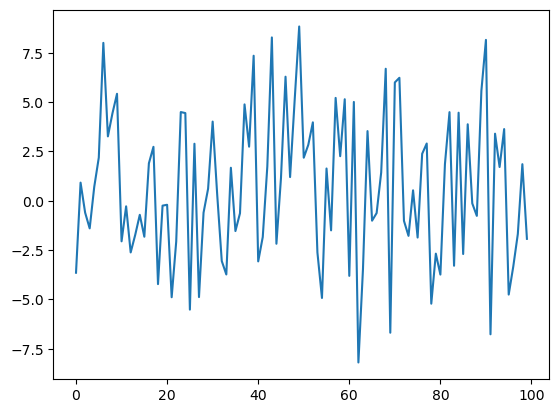

In [33]:
plt.plot(list(range(0,100)),np.random.normal(1,4,len(zsample1))); #We generate a pdf from normal distribution and plot it

In [66]:
np.random.normal(1,4,len(zsample1))[:20]

array([ 2.72820128,  2.9259447 , -2.81518952,  1.40919822,  4.95550732,
        3.07399724, -1.90887495, -0.34159056,  6.88930849,  1.45507461,
       -1.47641971,  1.68477167,  1.25073058,  5.21215065,  4.01945249,
       -4.17093451, -5.32633002,  4.07926448,  2.37829414, -3.65011571])

In [67]:
#Create a noise and to zsample1 and carry out the test. The aim is to create one more sample for comparison
zsample2=zsample1+np.random.normal(1,4,len(zsample1))

In [49]:
zsample2

20046    10.965950
3024      2.801414
15663    -0.469590
20484     4.489104
9814      4.871644
           ...    
6052      2.681433
15975    11.432953
14331     5.171305
1606      4.925920
10915     4.042650
Name: median_income, Length: 100, dtype: float64

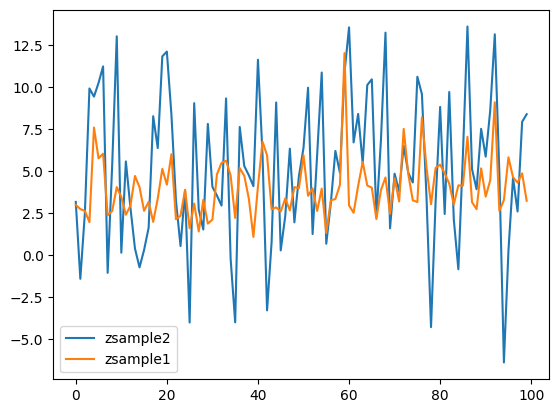

In [68]:
plt.plot(list(range(0,len(zsample2))),zsample2,label='zsample2')
plt.plot(list(range(0,len(zsample1))),zsample1,label='zsample1')
plt.legend()
plt.show();

In [70]:
statistics,p_value=ztest(zsample1,zsample2,population_mean)

In [71]:
p_value

np.float64(1.6881862017922938e-26)

In [72]:
p_value < 0.05

np.True_

The p-value is less than the significance level, hence, we reject the null hypothesis. There is significance difference in the means of the two sample

In [ ]:
#for t test, we have the following code
#scipy.stats.ttest_ind(x1, x2, equal_var=True)  for paired samples(dep) use  scipy.stats.ttest_rel() function

## One way Analysis of Variance(ANOVA)
Assume that three groups of students selected randomly are exposed to different study environments. A study is then done to determine if there are a significance difference in their performance.


* H_0: populations means are all equal
* H_1: Population means are all different


In [73]:
group1=[68,87,69,71,65,75]
group2=[69,80,79,74,55,85]
group3=[73,70,65,79,64,71]

In [74]:
np.mean(group1),round(np.mean(group2),1),round(np.mean(group3),1)

(np.float64(72.5), np.float64(73.7), np.float64(70.3))

In [75]:
df=pd.DataFrame({'group':[group1,group2,group3],'groupings':['group1','group2','group3']})
df

,group,groupings
0,"[68, 87, 69, 71, 65, 75]",group1
1,"[69, 80, 79, 74, 55, 85]",group2
2,"[73, 70, 65, 79, 64, 71]",group3


In [76]:
from scipy.stats import f_oneway

In [77]:
f_stat,pvalue=f_oneway(group1,group2,group3)

In [78]:
pvalue

np.float64(0.7812755398859392)

F_statistic=0.7812755398859392, P-value is more than 0.5, hence, we do not reject the null hypothesis. There is a significant difference in the mean

In [95]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Pearson's correlation coefficient
Compute the correlation coefficient for different features

In [79]:
housing_data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [85]:
housing_data.iloc[:,:-1].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [86]:
housing_data.iloc[:,:-1].corr().iloc[:,-1]

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [85]:
housing_data.iloc[:,:-1].corr(method='spearman')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.879203,-0.150752,0.040120,0.063879,0.123527,0.060020,-0.009928,-0.069667
latitude,-0.879203,1.000000,0.032440,-0.018435,-0.056636,-0.123626,-0.074299,-0.088029,-0.165739
housing_median_age,-0.150752,0.032440,1.000000,-0.357162,-0.306544,-0.283879,-0.281989,-0.147308,0.074855
total_rooms,0.040120,-0.018435,-0.357162,1.000000,0.915021,0.816185,0.906734,0.271321,0.205952
total_bedrooms,0.063879,-0.056636,-0.306544,0.915021,1.000000,0.870937,0.975627,-0.006196,0.086259
population,0.123527,-0.123626,-0.283879,0.816185,0.870937,1.000000,0.903872,0.006268,0.003839
households,0.060020,-0.074299,-0.281989,0.906734,0.975627,0.903872,1.000000,0.030305,0.112737
median_income,-0.009928,-0.088029,-0.147308,0.271321,-0.006196,0.006268,0.030305,1.000000,0.676778
median_house_value,-0.069667,-0.165739,0.074855,0.205952,0.086259,0.003839,0.112737,0.676778,1.000000


## Wilcoxon signed-rank test
Determines there is a difference among the two samples
* H_0: The two samples have similar characteristics
* H_1: The two samples have different characteristics
  
We use Scipy module

In [90]:
list(range(4))

[0, 1, 2, 3]

In [88]:
def rand_lists(start,stop,quantity):
    ls=[]
    for i in range(quantity):
        ls.append(random.randint(start,stop))  #random.randint(start,stop) create a random integer between start and stop-1
    return ls


In [89]:
sample1_sugar=rand_lists(70,100,15)
sample2_sugar=rand_lists(77,100,15)

In [90]:
sample1_sugar

[72, 73, 76, 77, 75, 70, 89, 84, 94, 77, 73, 72, 83, 74, 87]

In [91]:
sample2_sugar

[95, 81, 80, 92, 77, 77, 86, 98, 79, 96, 87, 89, 93, 84, 99]

**The samples above shows the sugar level of 15 people in mg/dL taken before and after a meal.** 

**Determine if there is a significant difference in the sugar levels in the two samples.**

In [92]:
statistic,p_value=stats.wilcoxon(sample1_sugar,sample2_sugar)

In [93]:
p_value

np.float64(0.008226697399892359)

In [94]:
p_value<0.05

np.True_

The p-value is more than 0.05, hence, we do not reject the null hypothesis. There is sufficient evidence to prove that there is no a significant difference between the blood levels.

## Mann-Whitney U-test
It is also called, **the Wilcoxon Rank Sum Test**. It is used to determine if two samples are derived from the same population

Determines there is a difference among the two samples
* H_0: The two samples are from the same population
* H_1: The two samples are from different population

**A researcher wants to find out if the use of a new HIV AIDS therapy changes the strength of infection of HIV. The researcher measures the CD4 cells for 12 people before therapy then introduces them to 9 months of therapy and measures their CD4 cells. Using Mann-Whitney U-Test, determine if there is a change in the strength of infection of HIV AIDS. Test against a significance level of 0.05**

In [96]:
count_B4_therapy

[151, 139, 124, 126, 151, 132, 131, 130, 130, 126, 145, 160]

In [97]:
count_after_therapy

[149, 156, 169, 177, 144, 188, 157, 158, 163, 158]

In [95]:
count_B4_therapy=rand_lists(120,160,12)
count_after_therapy=rand_lists(140,200,10) # Data don't have to be of the same size but should be broadcastable

In [103]:
statistic,p_value=stats.mannwhitneyu(count_B4_therapy,count_after_therapy,method='exact')

In [99]:
p_value < 0.05

np.True_

The p_value is less than 0.05, therefore, we reject the null hypothesis. There is enough evidence to conclude that there is a significant change in the strength of infection (samples are not from the same population) 

## Kruskal-Wallis test
This test determines the difference in the preference or rating of two or more groups with that are independent and drawn from a distribution that is not normal.

For instance, consider a cake-baking competition among 3 chefs. The chefs are rated by 8 individuals based on the taste on their cake. The ratings from 1 to 10 are shown below.

In [100]:
#generate samples
chef1_taste=rand_lists(1,10,8)
chef2_taste=rand_lists(1,10,8)
chef3_taste=rand_lists(1,10,8)

In [101]:
chef1_taste

[7, 5, 10, 9, 8, 9, 7, 2]

In [102]:
chef2_taste

[4, 3, 7, 3, 7, 5, 4, 9]

In [103]:
chef3_taste

[9, 6, 1, 2, 10, 10, 9, 3]

In [109]:
statistic,p_value=stats.kruskal(chef1_taste,chef2_taste,chef3_taste)


In [104]:
p_value

np.float64(0.008226697399892359)

In [105]:
p_value > 0.05

np.False_

We do not reject the null hypothesis because p_value>0.05. There is a statistical difference among the tests of the cakes baked by the chefs

In [108]:
def Krul_test(array1,array2,array3,alpha):
    statistic,p_value=stats.kruskal(array1,array2,array3,alpha)
    """
    provide documenttations here
    """
    if p_value < alpha:
        return " reject the null hypothesis.There is no statistical difference among the tests of the cakes baked by the chefs"
    else:
        return " reject the null hypothesis.There is no statistical difference among the tests of the cakes baked by the chefs"
    
    


In [109]:
Krul_test(chef1_taste,chef2_taste,chef3_taste,0.05)

' reject the null hypothesis.There is no statistical difference among the tests of the cakes baked by the chefs'